# RL and Advanced DL: Домашнее задание 2

## Часть первая: крестики-нолики при помощи Q-обучения


1. Реализуйте обычное (табличное) Q-обучение. Обучите стратегии крестиков и ноликов для доски 3х3.
2. Попробуйте обучить стратегии крестиков и ноликов для доски 4х4 и/или 5х5.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import copy
import random
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from collections import defaultdict, deque

In [3]:
from utils import *

# Часть первая: крестики-нолики при помощи Q-обучения

#### Проверим win rate pi_eval относительно pi_other, во время обучения будем валидироваться относительно случайно стратегии

In [4]:
for size in [3, 4, 5]:
    print(f"{size}x{size}:")
    
    env = TicTacToe(n_rows=size, n_cols=size, n_win=size)
    print(f'\tCrossRandomPolicy:')
    wr, lr, dr = eval_policy(env, RandomPolicy(turn=CROSSES_TURN), RandomPolicy(turn=NOUGHTS_TURN), episodes=1000)
    print(f'\t\twin rate = {wr}\n\t\tlose rate = {lr}\n\t\tdraw rate = {dr}')
    print(f'\tNoughtsRandomPolicy:')
    wr, lr, dr = eval_policy(env, RandomPolicy(turn=NOUGHTS_TURN),  RandomPolicy(turn=CROSSES_TURN), episodes=1000)
    print(f'\t\twin rate = {wr}\n\t\tlose rate = {lr}\n\t\tdraw rate = {dr}')

3x3:
	CrossRandomPolicy:
		win rate = 0.572
		lose rate = 0.288
		draw rate = 0.14
	NoughtsRandomPolicy:
		win rate = 0.277
		lose rate = 0.602
		draw rate = 0.121
4x4:
	CrossRandomPolicy:
		win rate = 0.348
		lose rate = 0.273
		draw rate = 0.379
	NoughtsRandomPolicy:
		win rate = 0.287
		lose rate = 0.284
		draw rate = 0.429
5x5:
	CrossRandomPolicy:
		win rate = 0.258
		lose rate = 0.134
		draw rate = 0.608
	NoughtsRandomPolicy:
		win rate = 0.147
		lose rate = 0.249
		draw rate = 0.604


#### Обучим EpsGreedy стратегию с помощью Q-learning

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:58<00:00, 854.88it/s]


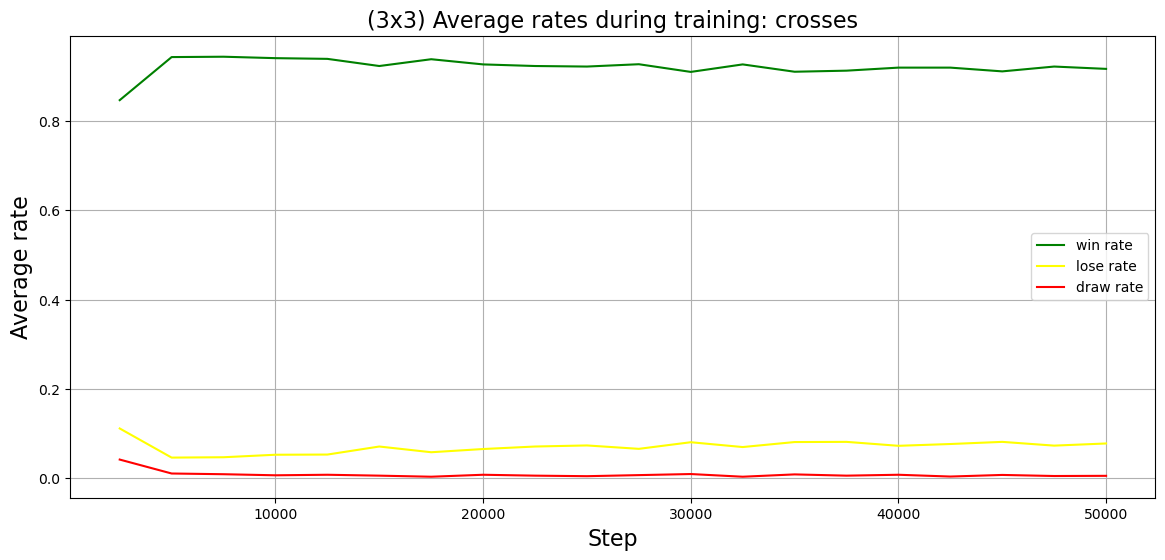

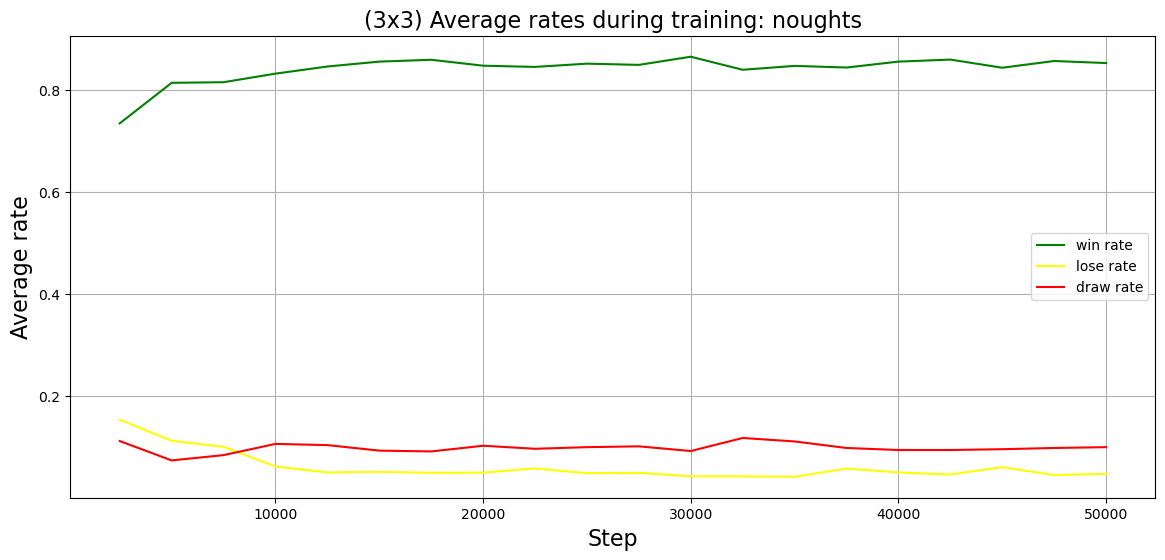

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:51<00:00, 961.83it/s]


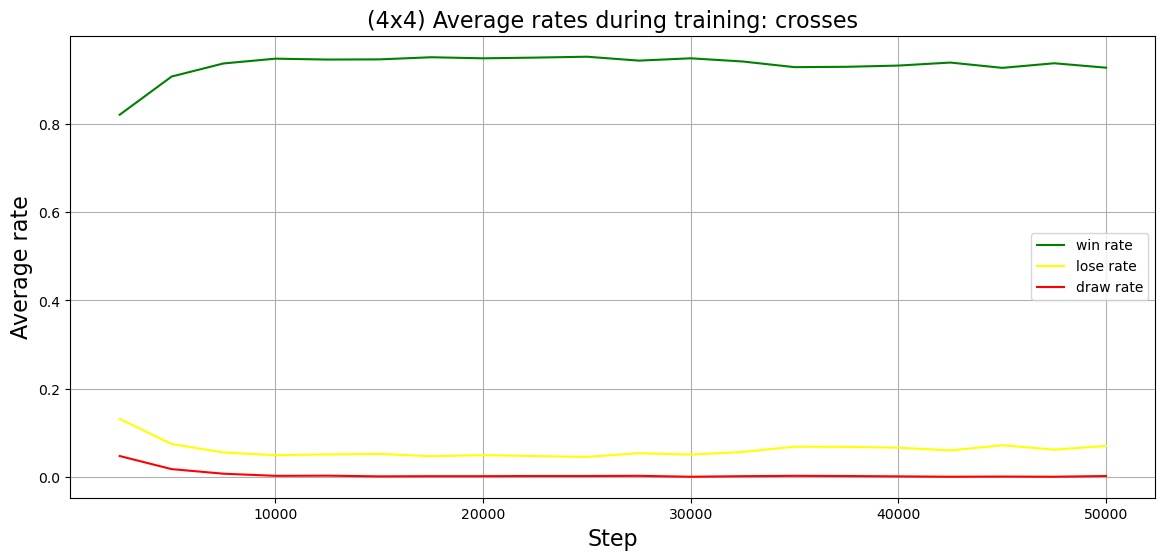

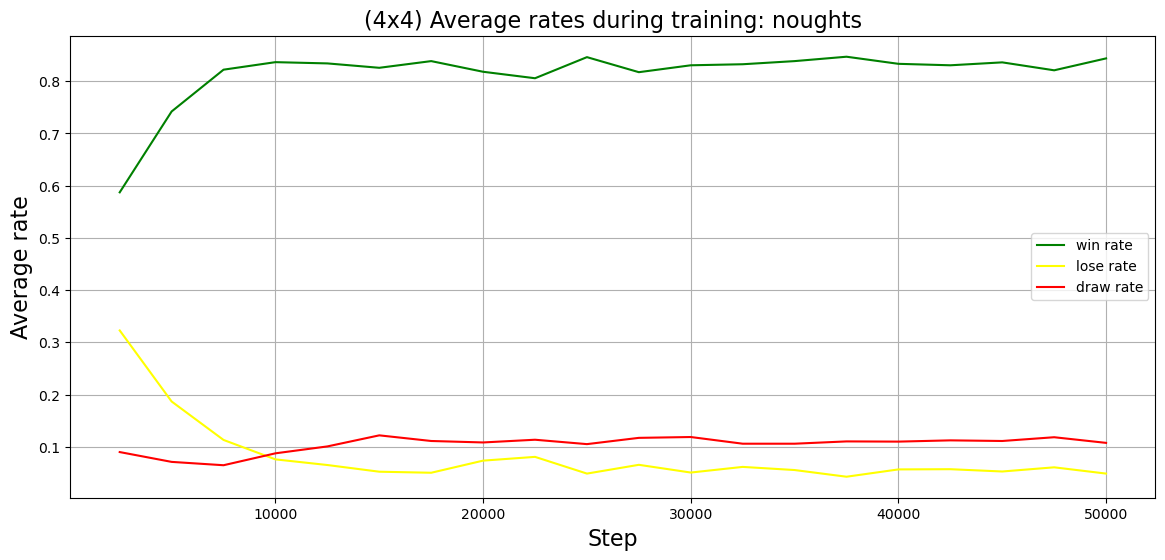

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:54<00:00, 912.50it/s]


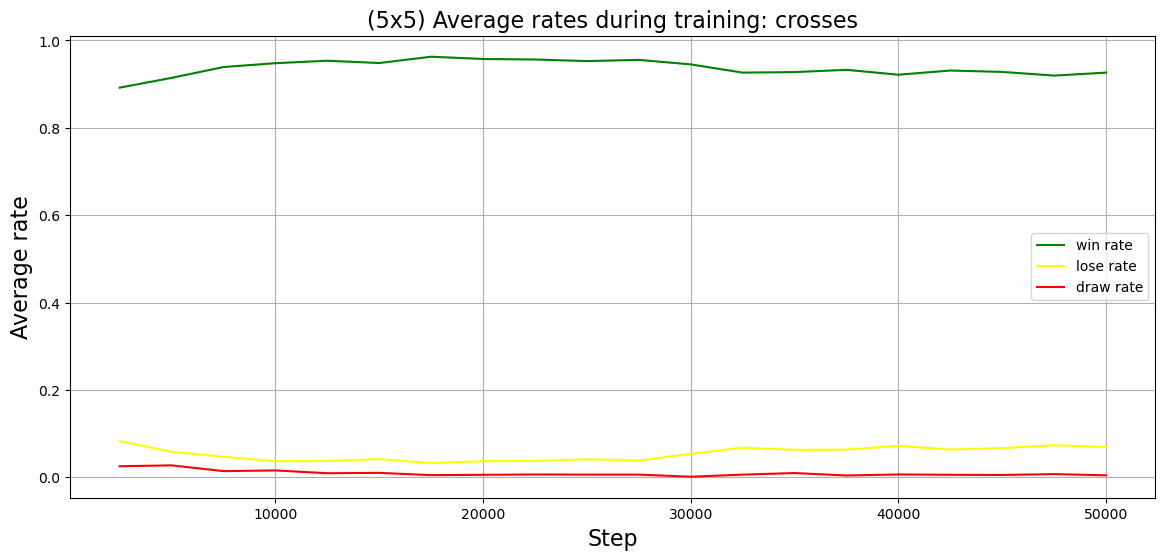

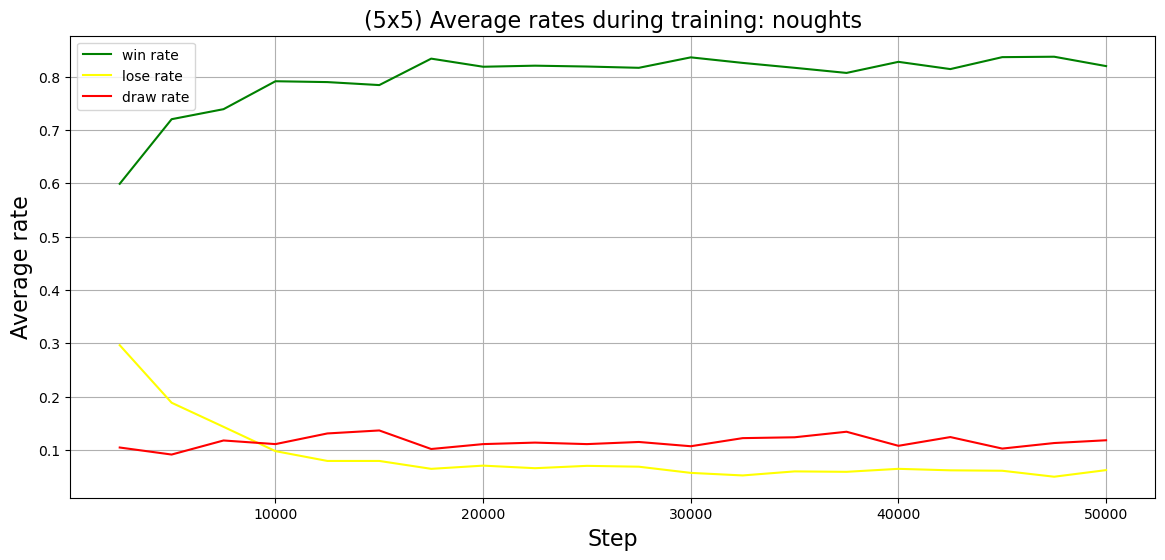

In [5]:
for size in [3, 4, 5]:
    hist = run_learning(
        TicTacToe(n_rows=3, n_cols=3, n_win=3),
        pi_crosses=EpsGreedyPolicy(turn=CROSSES_TURN),
        pi_noughts=EpsGreedyPolicy(turn=NOUGHTS_TURN),
        run_train_epoch=q_learning_train_epoch,
        args={'alpha': 0.01, 'gamma': 0.08},
        episodes=50_000
    )
    plot_history(hist, player='crosses', prefix=f'({size}x{size}) ')
    plot_history(hist, player='noughts', prefix=f'({size}x{size}) ')

## Часть вторая: добавим нейронных сетей

Реализуйте нейронную сеть для метода DQN на доске для крестиков-ноликов. Не буду ограничивать фантазию, но кажется, что свёртки 3х3 здесь должны неплохо работать (в том числе обобщаться на доски размера побольше).

1. Реализуйте DQN с нейронной сетью, обучите стратегии крестиков и ноликов. Note: скорее всего, experience replay потребуется сразу же.
2. Реализуйте Double DQN и/или Dueling DQN.

In [17]:
from nn_utils import *

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [15:29<00:00, 10.76it/s]


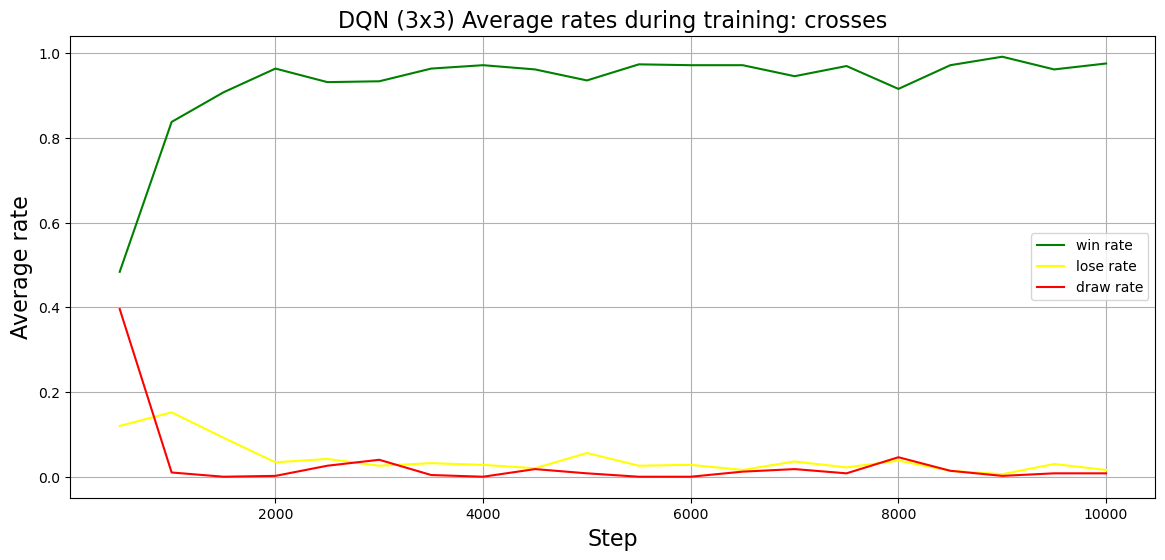

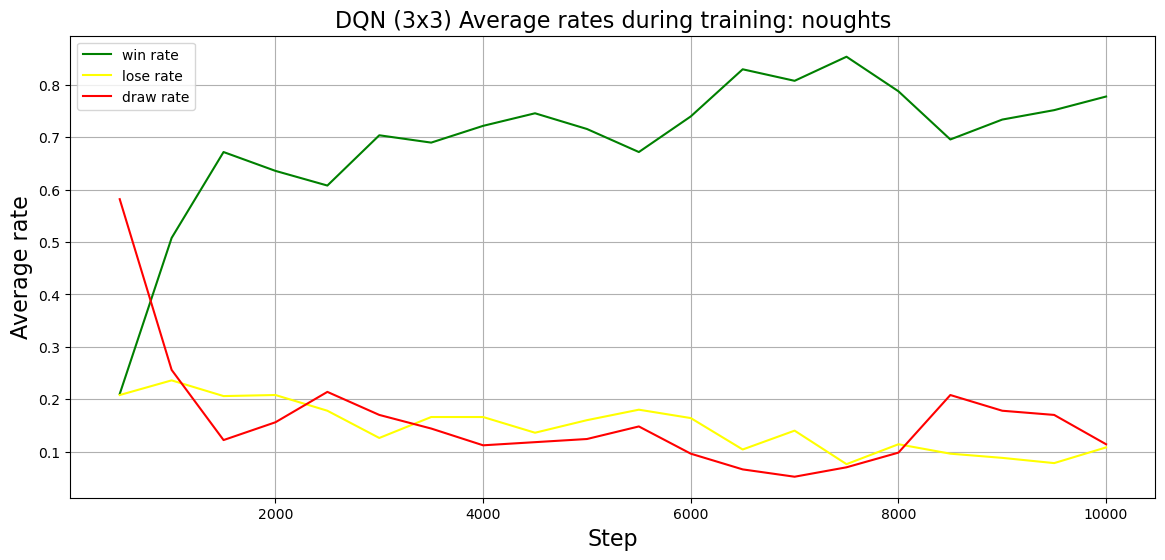

In [18]:
size = 3
env = TicTacToe(n_rows=size, n_cols=size, n_win=size)
hist = run_learning(
    env=env,
    pi_crosses=DQNAgent(turn=CROSSES_TURN, model=DQN(env)),
    pi_noughts=DQNAgent(turn=NOUGHTS_TURN, model=DQN(env)),
    run_train_epoch=dqn_learning_train_epoch,
    args={'batch_size': 512, 'gamma': 0.9},
    episodes=10000
)
prefix=f'DQN ({size}x{size}) '
plot_history(hist, player='crosses', prefix=prefix)
plot_history(hist, player='noughts', prefix=prefix)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:21<00:00, 70.79it/s]


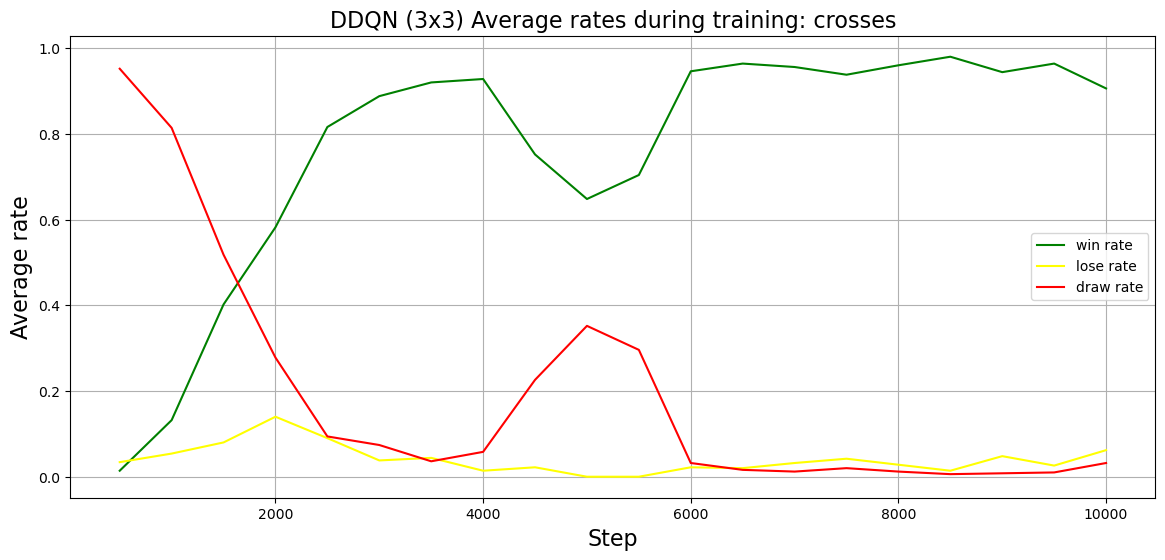

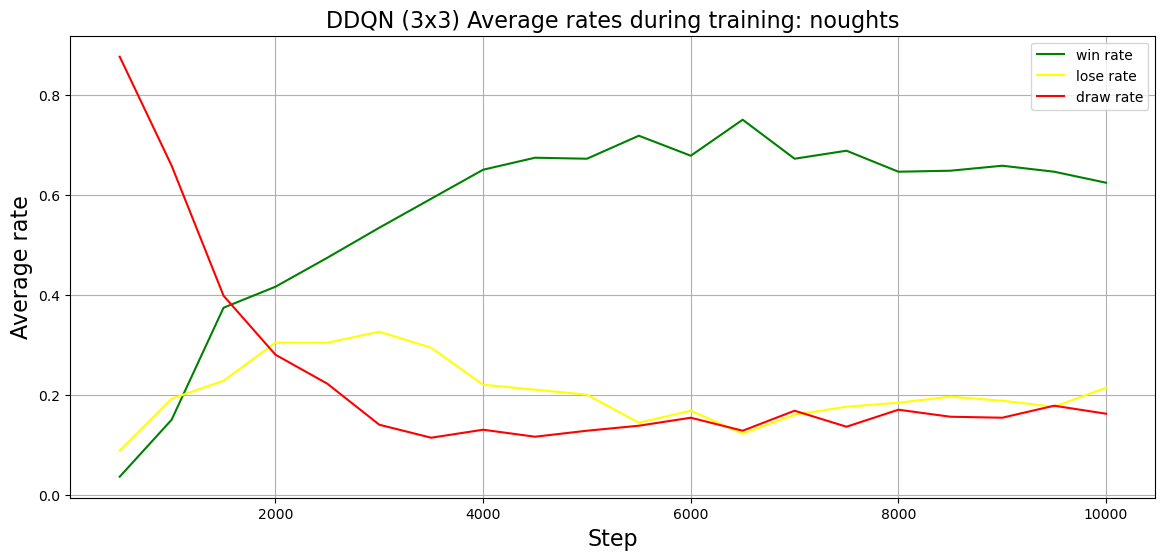

In [19]:
size = 3
env = TicTacToe(n_rows=size, n_cols=size, n_win=size)
hist = run_learning(
    env=env,
    pi_crosses=DDQNAgent(turn=CROSSES_TURN, model=DQN(env)),
    pi_noughts=DDQNAgent(turn=NOUGHTS_TURN, model=DQN(env)),
    run_train_epoch=dqn_learning_train_epoch,
    args={'batch_size': 512, 'gamma': 0.9},
    episodes=10000
)
prefix=f'DDQN ({size}x{size}) '
plot_history(hist, player='crosses', prefix=prefix)
plot_history(hist, player='noughts', prefix=prefix)